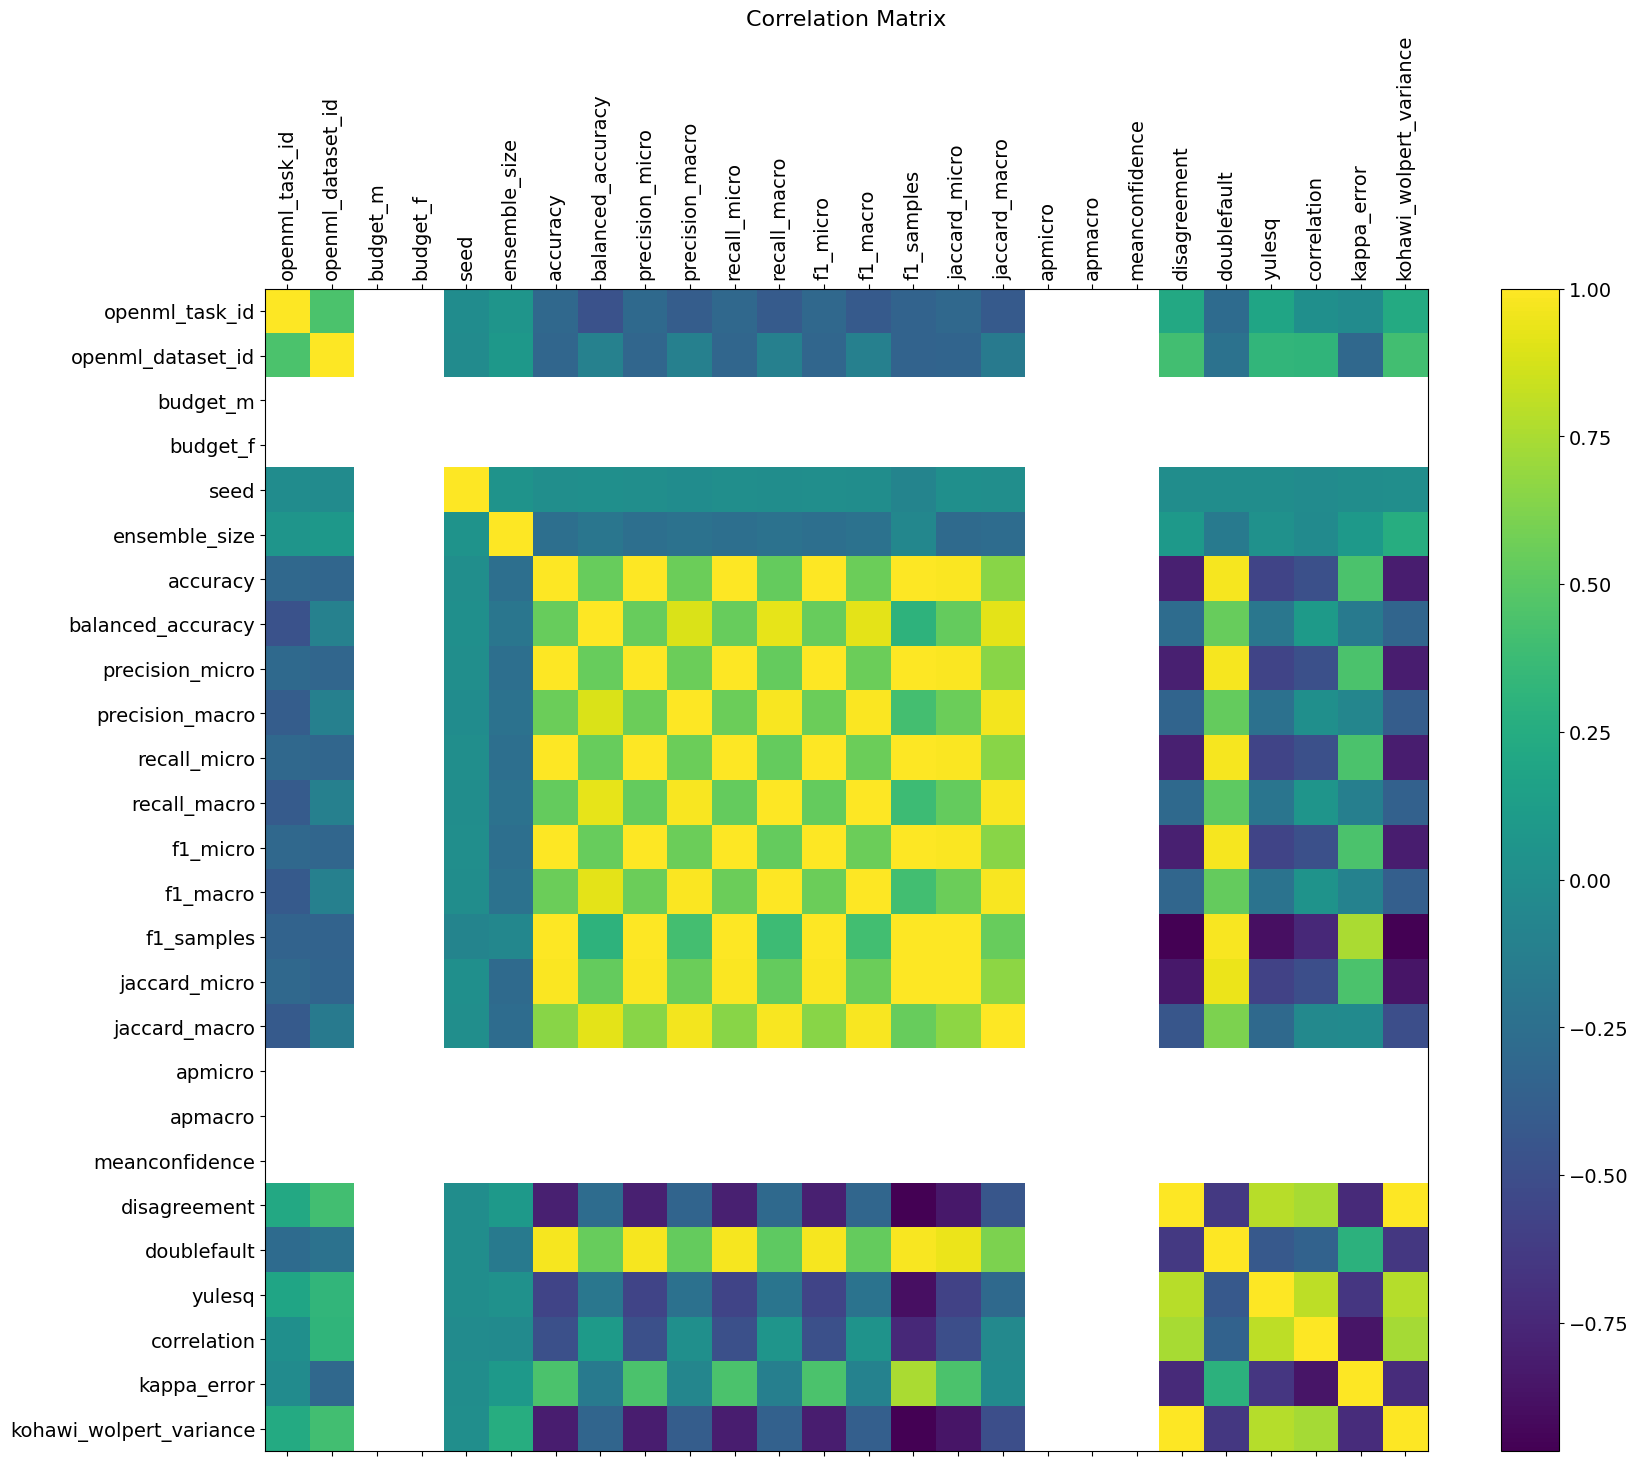

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load run configs
mrc_df = pd.read_csv('../merged_run_configs.csv')

# print(len(mrc_df.openml_task_id.unique()))

f = plt.figure(figsize=(19, 15))
plt.matshow(mrc_df.corr(), fignum=f.number)
plt.xticks(range(mrc_df.select_dtypes(['number']).shape[1]), mrc_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(mrc_df.select_dtypes(['number']).shape[1]), mrc_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
# As accuracy depends on how hard is the task, does this influence the correlation interpretations?

<Axes: xlabel='doublefault'>

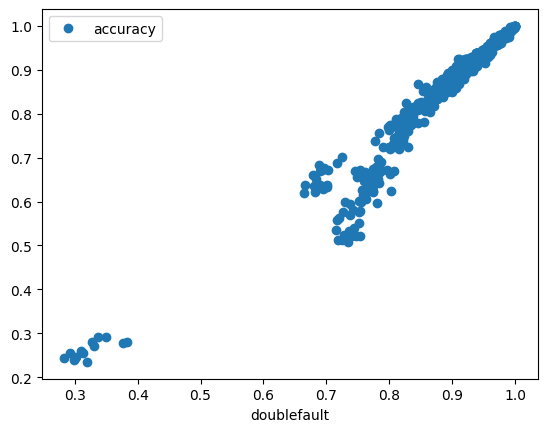

In [3]:
mrc_df.plot(x='doublefault', y='accuracy', style='o')


<Axes: xlabel='doublefault'>

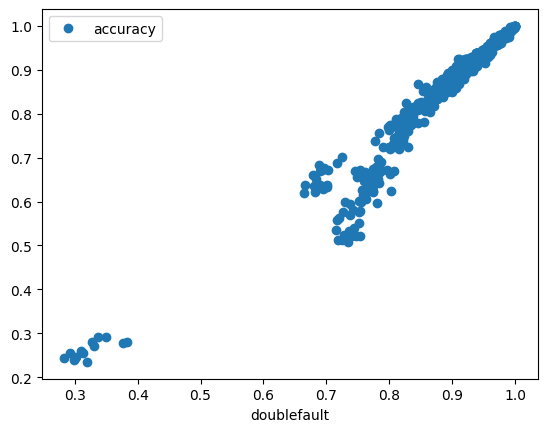

In [3]:
mrc_df.plot(x='doublefault', y='accuracy', style='o')


<Axes: xlabel='ensemble_size'>

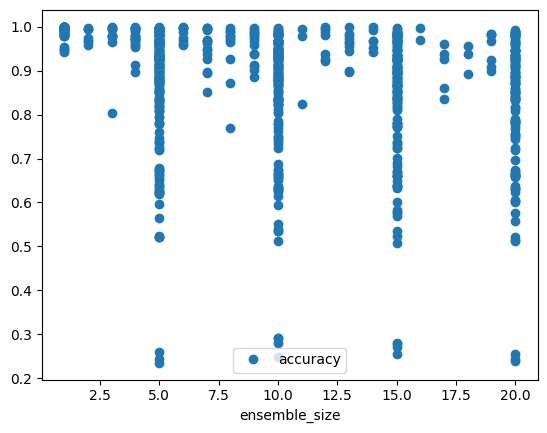

In [4]:
mrc_df.plot(x='ensemble_size', y='accuracy', style='o')


In [5]:
# Getting the best ensemble's metrics for each task
mrc_dfg = mrc_df.loc[mrc_df.reset_index().groupby(['openml_task_id'])['accuracy'].idxmax()]
mrc_dfg

,openml_task_id,openml_dataset_id,ens_pkl_file,budget_m,budget_f,seed,ensemble_size,base_classifiers_metrics,accuracy,balanced_accuracy,...,jaccard_macro,apmicro,apmacro,meanconfidence,disagreement,doublefault,yulesq,correlation,kappa_error,kohawi_wolpert_variance
80,279,50,ensemble-learners/el_task-279_ens-size-5_budge...,2000,100,358,5,"[['Model', {'accuracy': 0.9177215189873418, 'b...",0.996835,0.997436,...,0.662225,0,0,0,0.074684,0.991772,0.279185,0.802767,0.141431,0.029873
277,288,60,ensemble-learners/el_task-288_ens-size-15_budg...,2000,100,2,15,"[['Model', {'accuracy': 0.8387878787878787, 'b...",0.874545,0.874617,...,0.582933,0,0,0,0.115255,0.903567,0.045881,0.433590,0.557819,0.053786
795,2121,183,ensemble-learners/el_task-2121_ens-size-10_bud...,2000,100,598,10,"[['Model', {'accuracy': 0.25616835994194487, '...",0.280116,0.120312,...,0.068584,0,0,0,0.240558,0.382325,0.149889,0.622517,0.378011,0.108251
469,2122,184,ensemble-learners/el_task-2122_ens-size-20_bud...,2000,100,690,20,"[['Model', {'accuracy': 0.7675523871246489, 'b...",0.839598,0.817771,...,0.695216,0,0,0,0.192510,0.870164,0.095530,0.549357,0.449889,0.091442
66,3048,310,ensemble-learners/el_task-3048_ens-size-20_bud...,2000,100,247,20,"[['Model', {'accuracy': 0.9799457994579945, 'b...",0.988889,0.843158,...,0.787285,0,0,0,0.011008,0.990978,0.003929,0.375990,0.615487,0.005229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,189899,1549,ensemble-learners/el_task-189899_ens-size-10_b...,2000,100,919,10,"[['Model', {'accuracy': 0.2591093117408907, 'b...",0.291498,0.189538,...,0.094206,0,0,0,0.238956,0.350247,0.239393,0.651585,0.326940,0.107530
728,189902,1536,ensemble-learners/el_task-189902_ens-size-5_bu...,2000,100,992,5,"[['Model', {'accuracy': 0.96918013165769, 'bal...",0.969479,0.267233,...,0.249042,0,0,0,0.002932,0.969988,0.000057,0.047352,0.951908,0.001173
246,190158,41986,ensemble-learners/el_task-190158_ens-size-5_bu...,2000,100,430,5,"[['Model', {'accuracy': 0.987898982813048, 'ba...",0.990004,0.989446,...,0.982615,0,0,0,0.004069,0.991348,0.000531,0.189724,0.807572,0.001627
293,211720,41972,ensemble-learners/el_task-211720_ens-size-10_b...,2000,100,35,9,"[['Model', {'accuracy': 0.9108385813722241, 'b...",0.938349,0.928582,...,0.798756,0,0,0,0.108644,0.952933,0.095960,0.597898,0.403770,0.048286


<Axes: title={'center': 'Ensemble size from best ensemble for each task'}, xlabel='Ensemble Size', ylabel='Count'>

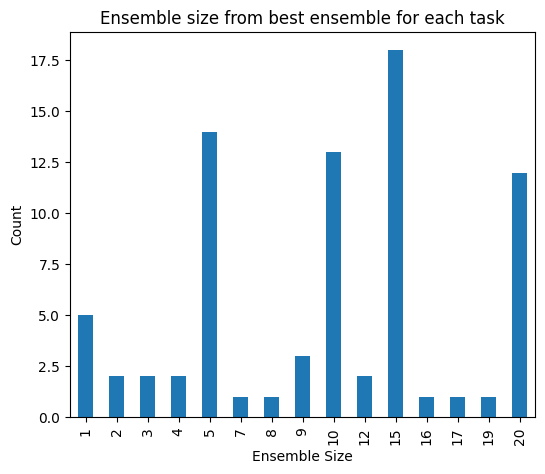

In [6]:
mrc_dfg = mrc_dfg.groupby('ensemble_size')['openml_task_id'].count()
mrc_dfg.plot(kind='bar', title='Ensemble size from best ensemble for each task', ylabel='Count',
         xlabel='Ensemble Size', figsize=(6, 5))
# note: there are some with the same accuracy. Then, the one with lower ensemble size is used
# TODO maybe calculate percentile?

In [7]:
# Load mf
mf_df = pd.read_csv('../metafeatures_cleansed.csv')

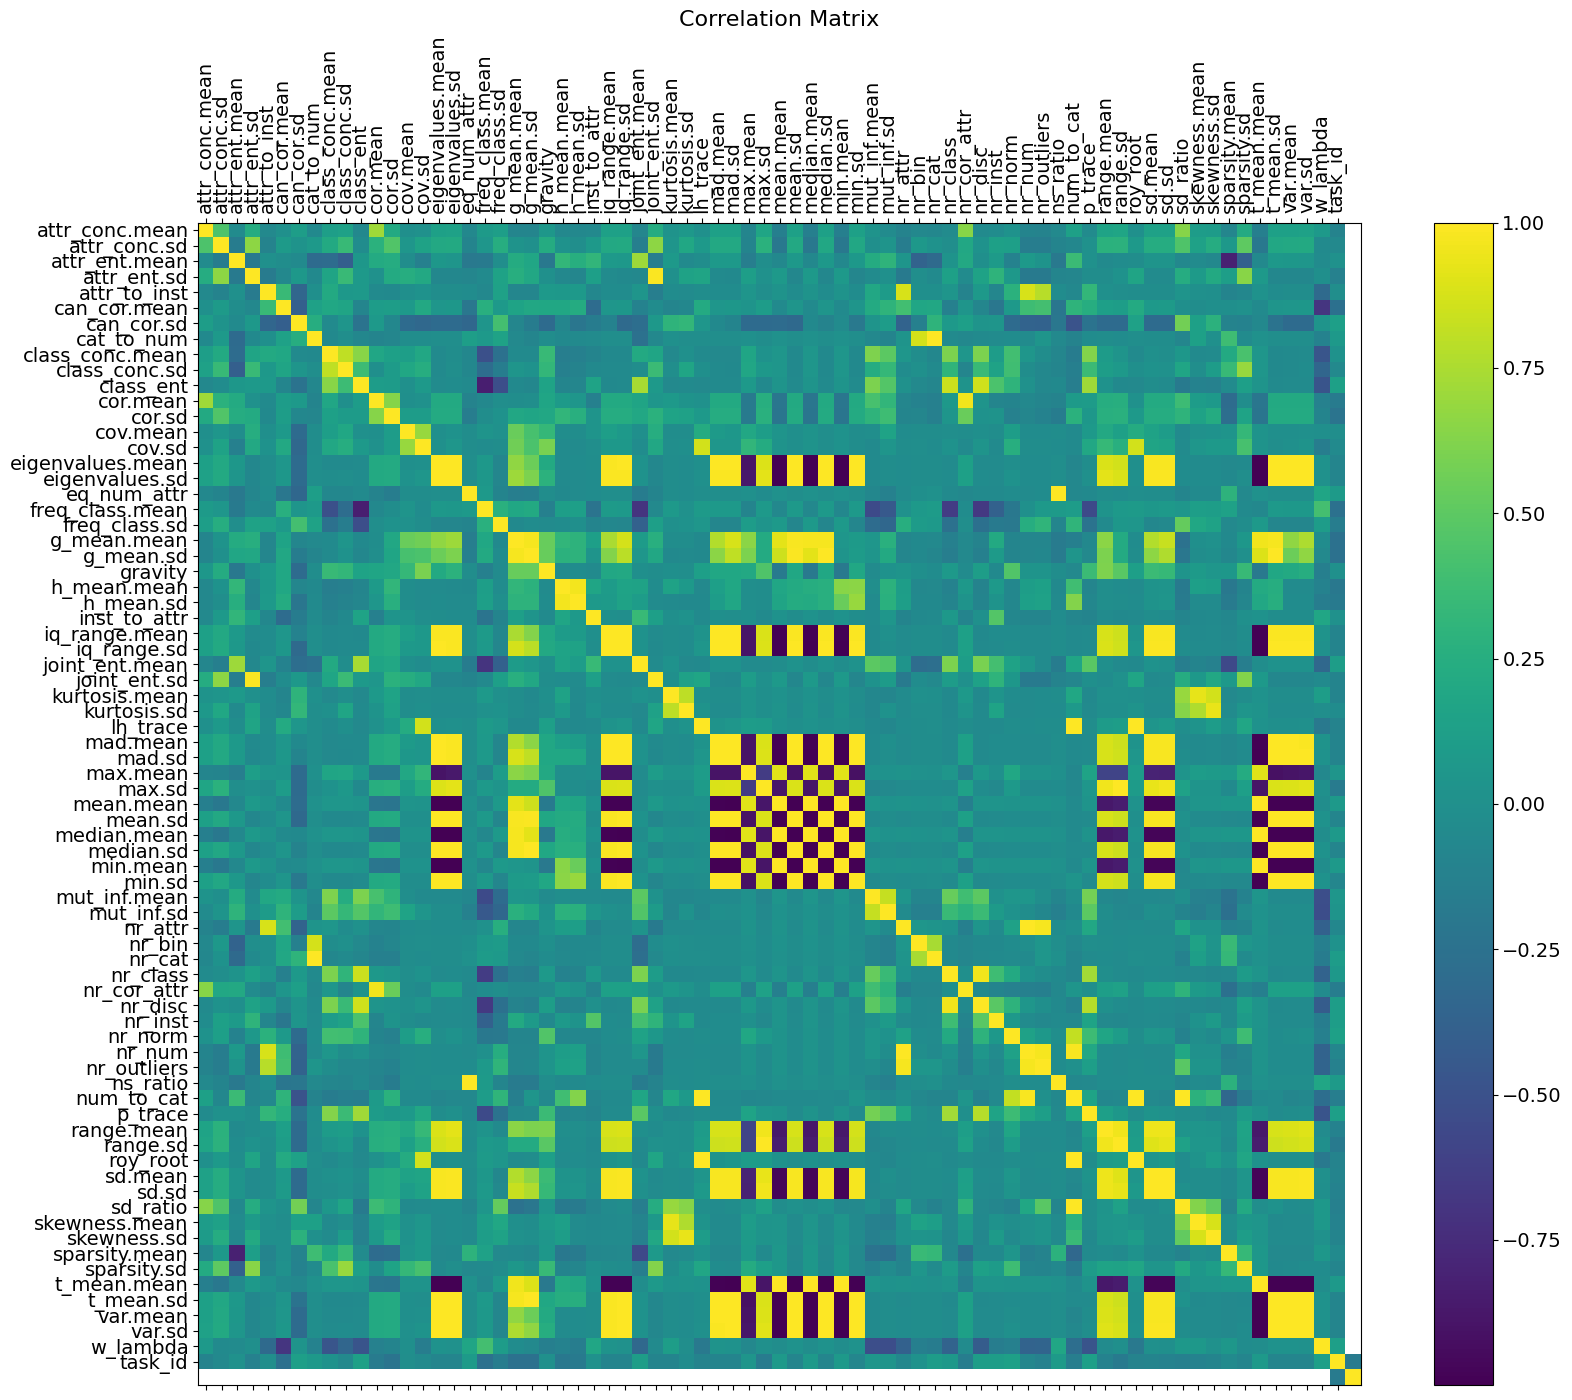

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(mf_df.corr(), fignum=f.number)
plt.xticks(range(mf_df.select_dtypes(['number']).shape[1]), mf_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(mf_df.select_dtypes(['number']).shape[1]), mf_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

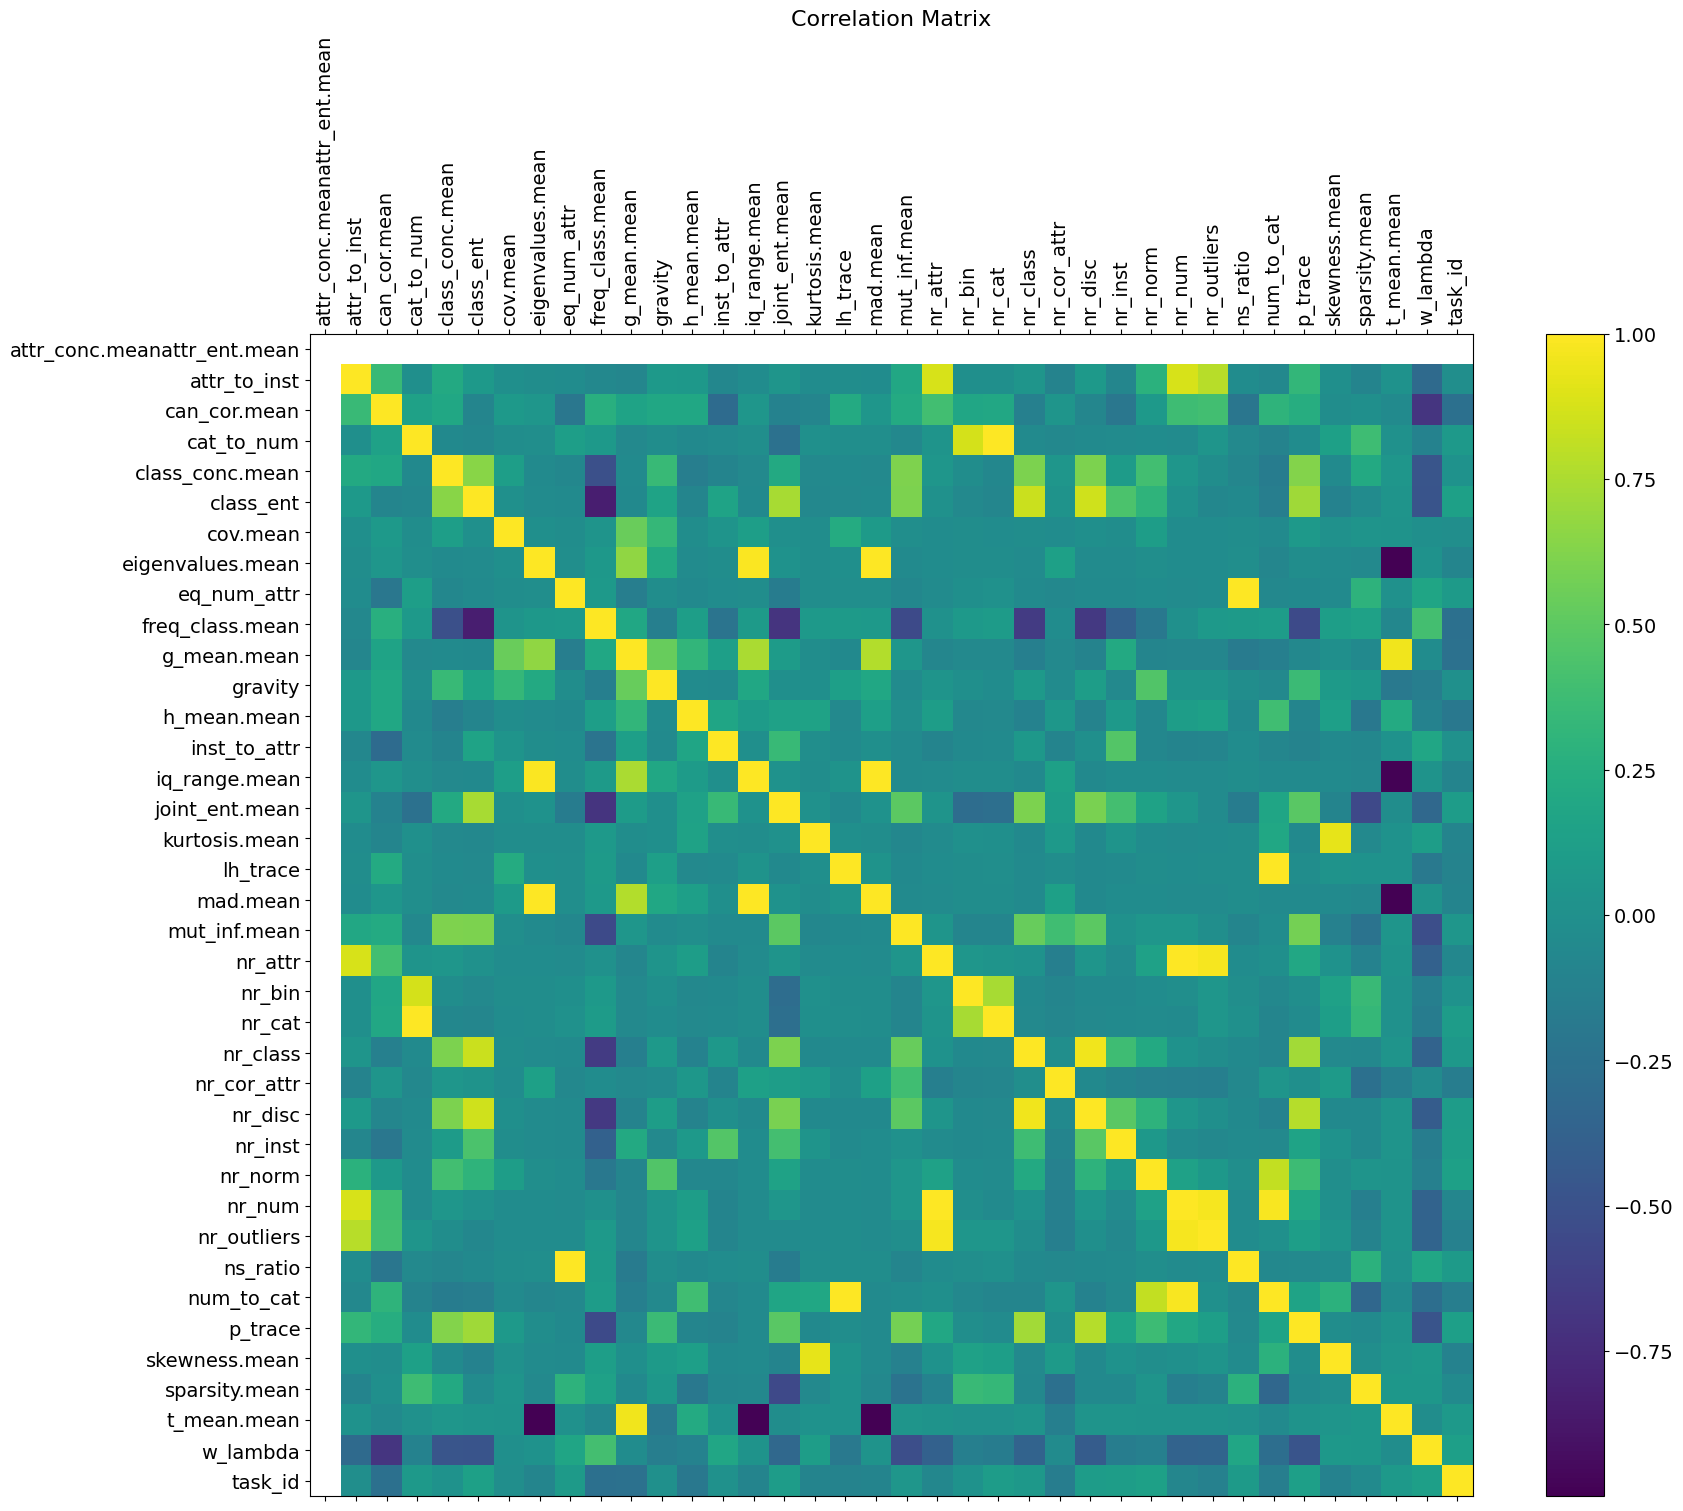

In [9]:
mf_df = mf_df.reindex(['attr_conc.mean' 'attr_ent.mean',
       'attr_to_inst', 'can_cor.mean', 'cat_to_num',
       'class_conc.mean', 'class_ent',
       'cov.mean', 'eigenvalues.mean',
       'eq_num_attr', 'freq_class.mean', 'g_mean.mean',
       'gravity', 'h_mean.mean', 'inst_to_attr',
       'iq_range.mean', 'joint_ent.mean',
       'kurtosis.mean', 'lh_trace', 'mad.mean',
       'mut_inf.mean',
       'nr_attr', 'nr_bin', 'nr_cat', 'nr_class', 'nr_cor_attr', 'nr_disc',
       'nr_inst', 'nr_norm', 'nr_num', 'nr_outliers', 'ns_ratio', 'num_to_cat',
       'p_trace', 'skewness.mean', 'sparsity.mean',
       't_mean.mean',
       'w_lambda', 'task_id'], axis=1)
f = plt.figure(figsize=(19, 15))
plt.matshow(mf_df.corr(), fignum=f.number)
plt.xticks(range(mf_df.select_dtypes(['number']).shape[1]), mf_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(mf_df.select_dtypes(['number']).shape[1]), mf_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

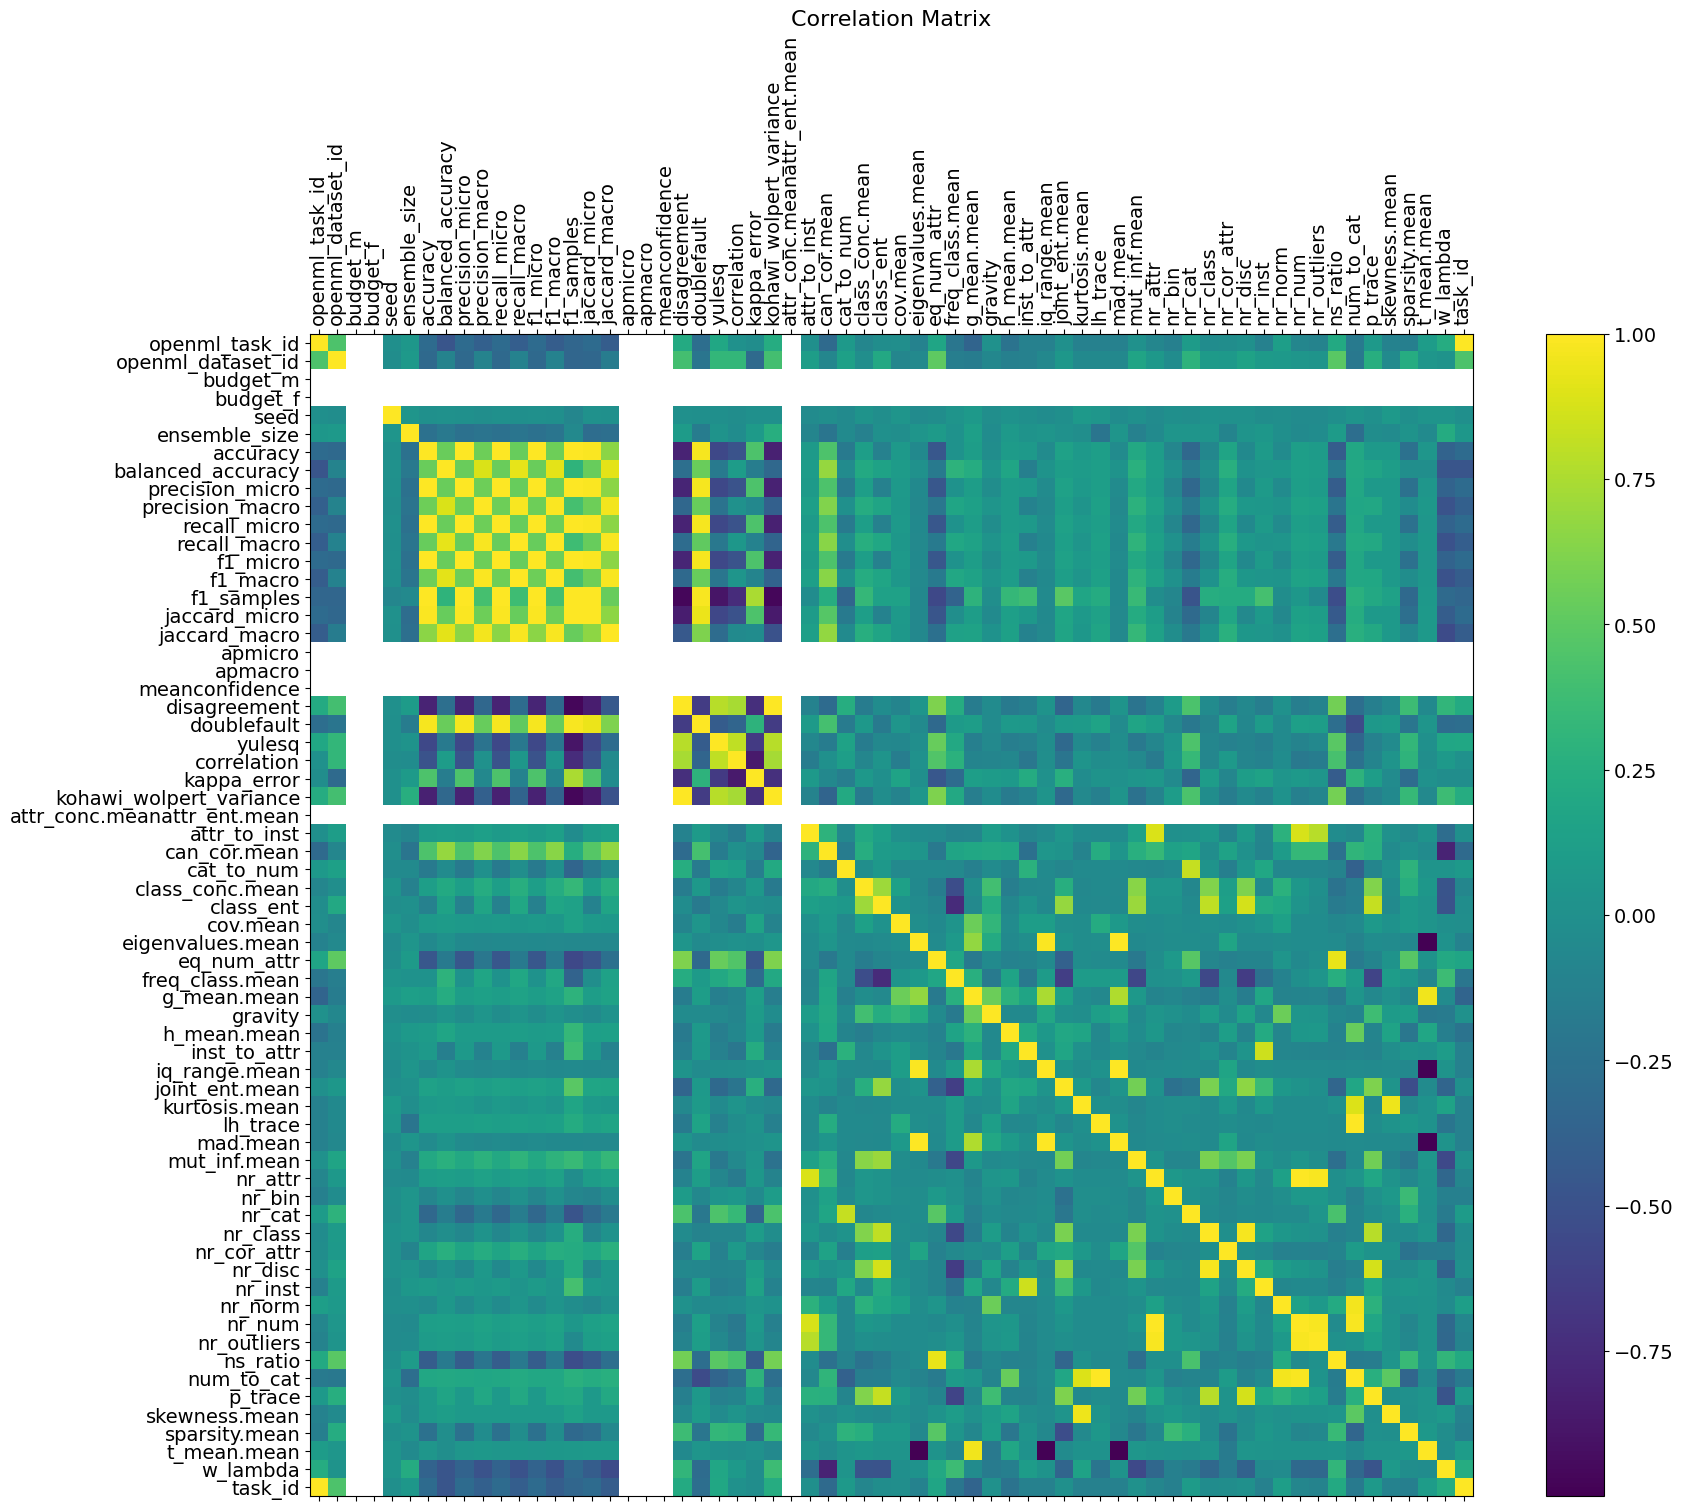

In [10]:
joined_df = pd.merge(mrc_df, mf_df, left_on=['openml_task_id'], right_on=['task_id'])

f = plt.figure(figsize=(19, 15))
plt.matshow(joined_df.corr(), fignum=f.number)
plt.xticks(range(joined_df.select_dtypes(['number']).shape[1]), joined_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(joined_df.select_dtypes(['number']).shape[1]), joined_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [11]:
# check whether the fusion method or other ensemble characteristics influence the quality metrics

In [4]:
perf_results_df = pd.read_csv('experiments/03-ranking/perf_results_nearest_neighbor-retrain_all_ensembles_from_nn.csv')


In [7]:
perf_results_df.corr(method='pearson')


,task_id,nearest_neighbor_task_id,nearest_neighbor_distance,accuracy_rank_in_original_task,accuracy,balanced_accuracy,precision_micro,precision_macro,recall_micro,recall_macro,...,original_task_jaccard_macro,original_task_apmicro,original_task_apmacro,original_task_meanconfidence,original_task_disagreement,original_task_doublefault,original_task_yulesq,original_task_correlation,original_task_kappa_error,original_task_kohawi_wolpert_variance
task_id,1.000000,0.341650,-0.139488,0.034374,-0.244898,-0.413054,-0.242411,-0.420786,-0.241054,-0.410409,...,-0.331563,NaN,NaN,NaN,0.123037,-0.201662,0.105440,0.016025,-0.041558,0.119543
nearest_neighbor_task_id,0.341650,1.000000,-0.166812,0.142784,-0.026627,-0.253767,-0.031974,-0.236599,-0.028850,-0.255510,...,-0.372123,NaN,NaN,NaN,0.205116,-0.255163,0.196833,0.057011,-0.080153,0.229912
nearest_neighbor_distance,-0.139488,-0.166812,1.000000,-0.047176,-0.217684,-0.000812,-0.217128,0.018096,-0.218461,-0.002217,...,0.124823,NaN,NaN,NaN,-0.014891,-0.066219,-0.063427,0.033061,-0.071665,-0.059076
accuracy_rank_in_original_task,0.034374,0.142784,-0.047176,1.000000,-0.000870,-0.015493,0.001675,-0.003942,0.005184,-0.011429,...,-0.115441,NaN,NaN,NaN,0.024021,-0.071416,0.021657,-0.026018,0.054713,0.021395
accuracy,-0.244898,-0.026627,-0.217684,-0.000870,1.000000,0.617861,0.997718,0.645293,0.995373,0.614745,...,0.080751,NaN,NaN,NaN,-0.347729,0.357083,-0.290442,-0.249288,0.223154,-0.258508
balanced_accuracy,-0.413054,-0.253767,-0.000812,-0.015493,0.617861,1.000000,0.616581,0.951243,0.616450,0.997922,...,0.540718,NaN,NaN,NaN,-0.057172,0.281883,-0.069214,0.179968,-0.207744,-0.046466
precision_micro,-0.242411,-0.031974,-0.217128,0.001675,0.997718,0.616581,1.000000,0.644875,0.996614,0.615604,...,0.075756,NaN,NaN,NaN,-0.346863,0.357964,-0.290438,-0.247315,0.221818,-0.256848
precision_macro,-0.420786,-0.236599,0.018096,-0.003942,0.645293,0.951243,0.644875,1.000000,0.646099,0.950987,...,0.464983,NaN,NaN,NaN,-0.053229,0.172926,-0.068491,0.173431,-0.199149,-0.035446
recall_micro,-0.241054,-0.028850,-0.218461,0.005184,0.995373,0.616450,0.996614,0.646099,1.000000,0.619324,...,0.076981,NaN,NaN,NaN,-0.349960,0.359406,-0.292755,-0.251089,0.225275,-0.259489
recall_macro,-0.410409,-0.255510,-0.002217,-0.011429,0.614745,0.997922,0.615604,0.950987,0.619324,1.000000,...,0.538490,NaN,NaN,NaN,-0.058478,0.282393,-0.070505,0.178498,-0.206121,-0.047523
